# クラス編成問題

## 1. データの読み込み

In [126]:
%matplotlib inline 
import pandas as pd

# df=pd.read_csv('data.csv',index_col=0)
# df=pd.read_csv('data2.csv',index_col=0)
df=pd.read_csv('data3.csv',index_col=0)
df

,R01,R02,R03,R04,R05,R06,R07,R08,R09,R10
S001,NaN,2.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,4.0
S002,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN,1.0,3.0
S003,NaN,3.0,NaN,4.0,NaN,NaN,NaN,1.0,2.0,NaN
S004,4.0,NaN,2.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN
S005,NaN,1.0,4.0,NaN,NaN,3.0,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
S096,1.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN
S097,NaN,NaN,NaN,2.0,3.0,NaN,1.0,NaN,NaN,4.0
S098,NaN,NaN,1.0,NaN,NaN,4.0,NaN,2.0,3.0,NaN
S099,1.0,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN,2.0


## 2. データの整合性のチェック

In [127]:
for i in df.index:
    if (df.loc[i]==1).sum()==1 and \
        (df.loc[i]==2).sum()==1 and \
        (df.loc[i]==3).sum()==1 and \
        (df.loc[i]==4).sum()==1: 
        print(i,'ok')
    else:
        print(i,'NG')

S001 ok
S002 ok
S003 ok
S004 ok
S005 ok
S006 ok
S007 ok
S008 ok
S009 ok
S010 ok
S011 ok
S012 ok
S013 ok
S014 ok
S015 ok
S016 ok
S017 ok
S018 ok
S019 ok
S020 ok
S021 ok
S022 ok
S023 ok
S024 ok
S025 ok
S026 ok
S027 ok
S028 ok
S029 ok
S030 ok
S031 ok
S032 ok
S033 ok
S034 ok
S035 ok
S036 ok
S037 ok
S038 ok
S039 ok
S040 ok
S041 ok
S042 ok
S043 ok
S044 ok
S045 ok
S046 ok
S047 ok
S048 ok
S049 ok
S050 ok
S051 ok
S052 ok
S053 ok
S054 ok
S055 ok
S056 ok
S057 ok
S058 ok
S059 ok
S060 ok
S061 ok
S062 ok
S063 ok
S064 ok
S065 ok
S066 ok
S067 ok
S068 ok
S069 ok
S070 ok
S071 ok
S072 ok
S073 ok
S074 ok
S075 ok
S076 ok
S077 ok
S078 ok
S079 ok
S080 ok
S081 ok
S082 ok
S083 ok
S084 ok
S085 ok
S086 ok
S087 ok
S088 ok
S089 ok
S090 ok
S091 ok
S092 ok
S093 ok
S094 ok
S095 ok
S096 ok
S097 ok
S098 ok
S099 ok
S100 ok


## 3. データの分析

In [129]:
d = {j: [(df.loc[:,j]==1).sum(),(df.loc[:,j]==2).sum(),
         (df.loc[:,j]==3).sum(),(df.loc[:,j]==4).sum(),
        (df.loc[:,j]> 0).sum()] for j in df.columns}
df2 = pd.DataFrame(d,
                 index=['第1希望', '第2希望','第3希望','第4希望','合計'])
df2

,R01,R02,R03,R04,R05,R06,R07,R08,R09,R10
第1希望,12,7,9,7,13,10,11,11,10,10
第2希望,10,10,10,11,7,11,9,10,11,11
第3希望,11,13,11,11,10,10,7,11,6,10
第4希望,11,11,8,12,12,11,8,7,10,10
合計,44,41,38,41,42,42,35,39,37,41


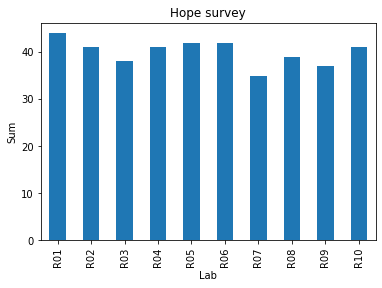

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline
df2.loc['合計'].plot(kind='bar')
plt.title('Hope survey')
plt.xlabel('Lab')
plt.ylabel('Sum')
plt.show()

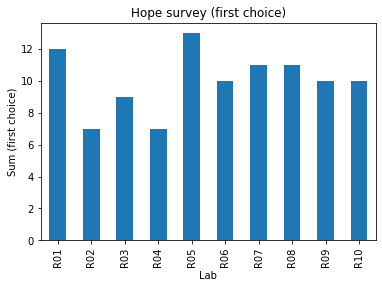

In [131]:
%matplotlib inline
df2.loc['第1希望'].plot(kind='bar')
plt.title('Hope survey (first choice)')
plt.xlabel('Lab')
plt.ylabel('Sum (first choice)')
plt.show()

## 4. クラス編成最適化

In [132]:
from pulp import *
from itertools import product # くり返しのため
import math # floor, ceil関数のため
MEPS=1.0e-6

In [133]:
n=len(df.index) # 学生の数
m=len(df.columns) # クラスの数
lb=math.floor(n/m) # 1クラス人数の下限
ub=math.ceil(n/m) # 1クラス人数の上限

In [134]:
# 満足度
score={1:100,2:50,3:30,4:0}
ngscore=-100000 # 希望外

In [135]:
prob=LpProblem('ClassAssgnment',sense=LpMaximize)
x={}
p={}
for i,j in product(df.index,df.columns):
    x[i,j]=LpVariable('x('+str(i)+','+str(j)+')',lowBound=0)
    p[i,j]=score[int(df.loc[i,j])] if df.loc[i,j]>MEPS else ngscore

In [136]:
# 目的関数
prob += lpSum(p[i,j]*x[i,j] for i, j in product(df.index,df.columns))

In [137]:
# 制約式
for i in df.index:
    prob += lpSum(x[i,j] for j in df.columns)==1
for j in df.columns:
    prob += lpSum(x[i,j] for i in df.index) >= lb
    prob += lpSum(x[i,j] for i in df.index) <= ub

In [138]:
# 最適化
prob.solve()
# 解の出力
print(LpStatus[prob.status])
print('学生の満足度の総計は', int(value(prob.objective)))
print('学生一人当たりの平均満足度は', int(value(prob.objective))/n)

Optimal
学生の満足度の総計は 9650
学生一人当たりの平均満足度は 96.5


## 最適化結果の分析

In [139]:
# 配属の詳細とクラス別満足度
dfr=df.copy()
for i,j in product(dfr.index,dfr.columns):
    dfr.loc[i,j]=df.loc[i,j] if x[i,j].varValue > MEPS else 0

d2={j:[(dfr.loc[:,j]==1).sum(),(dfr.loc[:,j]==2).sum(),
      (dfr.loc[:,j]==3).sum(),(dfr.loc[:,j]==4).sum(),
      (dfr.loc[:,j]>0).sum(),
       sum([p[i,j] for i in df.index
            if x[i,j].varValue > MEPS])] for j in dfr.columns}
df3=pd.DataFrame(d2,
                   index=['第1希望', '第2希望','第3希望','第4希望','合計','クラス満足度'])
df3

,R01,R02,R03,R04,R05,R06,R07,R08,R09,R10
第1希望,10,7,9,7,10,10,10,10,10,10
第2希望,0,3,1,3,0,0,0,0,0,0
第3希望,0,0,0,0,0,0,0,0,0,0
第4希望,0,0,0,0,0,0,0,0,0,0
合計,10,10,10,10,10,10,10,10,10,10
クラス満足度,1000,850,950,850,1000,1000,1000,1000,1000,1000
